### Peculiar ring galaxies in the Southern Photometric Local Universe Survey (S-PLUS)

In [ ]:
!pip install pandas==2.1.3
!pip install splusdata==4.0
!pip install matplotlib
!pip install astropy==6.0.0
!pip install SkyCoord

In [2]:
import pandas as pd
import splusdata
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
from astropy import units as u
from astropy.coordinates import SkyCoord

In [3]:
csv = open('list.csv', errors='ignore')
df = pd.read_csv(csv)

In [4]:
# Login with your splus.cloud user

conn = splusdata.connect('username','password')

You have access to internal data


In [5]:
# Example of converting hour angle to degrees

coord = SkyCoord('00 37 04.664', '-34 56 24.26', unit = (u.hourangle, u.deg))
print (coord)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.26943333, -34.94007222)>


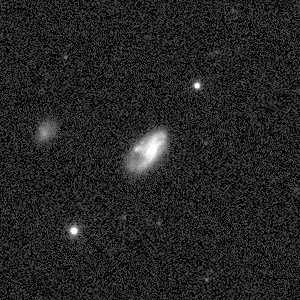

In [6]:
hdu = conn.get_band_img(coord.ra.degree, coord.dec.degree, 300, 'R')
hdu

In [12]:
# Filtering galaxies found in S-PLUS

counttrue = 0
countfalse = 0
lists_found = []

for i in range(0,len(df)):
    amostra = df.iloc[i]
    RA = amostra['RA']
    DEC = amostra['DEC']
    coord = SkyCoord(RA, DEC, unit = (u.hourangle, u.deg)) # converting hour angle to degrees
    res = conn.checkcoords(coord.ra.degree, coord.dec.degree)
    if(res['distance'] > 0.7):
        res = False
        countfalse += 1
        lists_found.append(res)
    else:
        res = True
        counttrue +=1
        lists_found.append(res)

print('Samples found:', counttrue)
print('Samples not found:', countfalse)

Samples found: 55
Samples not found: 259


In [13]:
df['S-Plus'] = lists_found
df

,Objetos,RA,DEC,z,Tipos,S-Plus
0,AM 0034-351,00 37 04.664,-34 56 24.26,0.029657,E.Rb,True
1,AM 0045-230,00 47 34.795,-22 48 00.24,0.021872,E.Ra,False
2,AM 0053-353,00 56 19.563,-35 14 52.31,0.047947,HL,True
3,AM 0054-634,00 56 51.290,-63 28 51.88,0.0374,E.Ra,False
4,AM 0058-220,01 00 46.9,-21 43 27,–,E.Rc,False
...,...,...,...,...,...,...
309,NGC 2793,09 16 45.602,+34 25 54.51,0.005627,E.Ra,False
310,NGC 4774,12 53 06.515,+36 49 10.93,0.027823,E.Rc,False
311,PRC D-38,22 28 53.9303,-24 43 44.127,0.055932,E.Rc,False
312,VII Zw 466,12 32 05.0,+66 24 12,0.048333,E.Rc,False


In [14]:
df.to_csv('lists_found.csv')

In [15]:
found_df=df.loc[df['S-Plus']==True]

In [16]:
found_df = found_df.reset_index(drop=True)

In [ ]:
found_df.to_csv('galaxies_found_splus.csv')

In [5]:
galaxies_found = pd.read_csv('galaxies_found_splus.csv')
galaxies_found

,Unnamed: 0,Objetos,RA,DEC,z,Tipos,S-Plus
0,0,AM 0034-351,00 37 04.664,-34 56 24.26,0.029657,E.Rb,True
1,1,AM 0053-353,00 56 19.563,-35 14 52.31,0.047947,HL,True
2,2,AM 0058-311,01 00 44.610,-30 55 49.16,0.07776,E.Ra,True
3,3,AM 0147-350,01 49 43.711,-34 49 51.74,0.0275,H,True
4,4,AM 0154-353,01 57 06,-35 18 54,–,E.Rc,True
5,5,AM 0157-311,01 59 37,-31 01.3,0.05918,E.Rc,True
6,6,AM 0229-444,02 31 38.764,-44 31 27.37,0.017829,HL,True
7,7,AM 0329-715,03 29 43.7,-71 45 25,–,H,True
8,8,AM 0403-555,04 04 16.406,-55 46 23,–,E.Rb,True
9,9,AM 0412-525,04 13 50.5,-52 47 43,–,H,True


###### Detalhes: https://www.splus.iag.usp.br/instrumentation/
###### Bandas: R(SDSS-like r), I(SDSS-like i), F861(Ca Triplet), Z(SDSS-like z), G(SDSS-like g), F515(Mgb Triplet), F660(Hα), U(Javalambre u), F378(OII), F395(Ca H+K), F410(Hδ), F430(G-band)

In [11]:
if not os.path.exists('images'):
    os.makedirs('images')

In [9]:
bands_found = []

In [10]:
# Searching images by filter

for index, amostra in galaxies_found.iterrows():
    coord = SkyCoord(amostra['RA'], amostra['DEC'], unit = (u.hourangle, u.deg)) # converting hour angle to degrees
    bandas=['R','I','F861','Z','G','F515','U','F660','F378','F395','F410','F430']
    info_index = {}
    for banda in bandas:
        try:
            for radius in range(200,0,-10):
                 hdu = conn.get_cut(coord.ra.degree, coord.dec.degree, radius, banda)
                 if hdu:
                     break
            fig, ax = plt.subplots()
            ax.imshow(hdu[1].data,vmax=0.6,origin='lower')
            ax.set_title(f'{amostra['Objetos']} - {banda}')
            if not os.path.exists(f'images/'+amostra['Objetos']):
                os.makedirs(f'images/'+amostra['Objetos'])
            plt.savefig(f'images/'+amostra['Objetos']+f'/filter_{banda}.png')
            plt.close()
            info_index[banda] = 1
        except:
            info_index[banda] = 0
            print("obj:",amostra['Objetos'], "Filter not found:",banda)
    bands_found.append(info_index)

bands_found = pd.DataFrame(bands_found)
df_result_bands = pd.concat([galaxies_found, bands_found], axis=1)

In [ ]:
df_result_bands

,Objetos,RA,DEC,z,Tipos,S-Plus,R,I,F861,Z,G,F515,U,F660,F378,F395,F410,F430
0,AM 0034-351,00 37 04.664,-34 56 24.26,0.029657,E.Rb,True,1,1,1,1,1,1,1,1,1,1,1,1
1,AM 0045-230,00 47 34.795,-22 48 00.24,0.021872,E.Ra,False,0,0,0,0,0,0,0,0,0,0,0,0
2,AM 0053-353,00 56 19.563,-35 14 52.31,0.047947,HL,True,1,1,1,1,1,1,1,1,1,1,1,1
3,AM 0054-634,00 56 51.290,-63 28 51.88,0.0374,E.Ra,False,0,0,0,0,0,0,0,0,0,0,0,0
4,AM 0058-220,01 00 46.9,-21 43 27,–,E.Rc,False,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,NGC 2793,09 16 45.602,+34 25 54.51,0.005627,E.Ra,False,0,0,0,0,0,0,0,0,0,0,0,0
310,NGC 4774,12 53 06.515,+36 49 10.93,0.027823,E.Rc,False,0,0,0,0,0,0,0,0,0,0,0,0
311,PRC D-38,22 28 53.9303,-24 43 44.127,0.055932,E.Rc,False,0,0,0,0,0,0,0,0,0,0,0,0
312,VII Zw 466,12 32 05.0,+66 24 12,0.048333,E.Rc,False,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_result_bands.to_csv('complete_list_bands.csv')

In [6]:
result_bands = pd.read_csv('complete_list_bands.csv')
result_bands

,Unnamed: 0,Objetos,RA,DEC,z,Tipos,S-Plus,R,I,F861,Z,G,F515,U,F660,F378,F395,F410,F430
0,0,AM 0034-351,00 37 04.664,-34 56 24.26,0.029657,E.Rb,True,1,1,1,1,1,1,1,1,1,1,1,1
1,1,AM 0045-230,00 47 34.795,-22 48 00.24,0.021872,E.Ra,False,0,0,0,0,0,0,0,0,0,0,0,0
2,2,AM 0053-353,00 56 19.563,-35 14 52.31,0.047947,HL,True,1,1,1,1,1,1,1,1,1,1,1,1
3,3,AM 0054-634,00 56 51.290,-63 28 51.88,0.0374,E.Ra,False,0,0,0,0,0,0,0,0,0,0,0,0
4,4,AM 0058-220,01 00 46.9,-21 43 27,–,E.Rc,False,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,NGC 2793,09 16 45.602,+34 25 54.51,0.005627,E.Ra,False,0,0,0,0,0,0,0,0,0,0,0,0
310,310,NGC 4774,12 53 06.515,+36 49 10.93,0.027823,E.Rc,False,0,0,0,0,0,0,0,0,0,0,0,0
311,311,PRC D-38,22 28 53.9303,-24 43 44.127,0.055932,E.Rc,False,0,0,0,0,0,0,0,0,0,0,0,0
312,312,VII Zw 466,12 32 05.0,+66 24 12,0.048333,E.Rc,False,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
matplotlib.rcParams['figure.max_open_warning'] = 56

In [ ]:
if not os.path.exists('twelve_bands'):
    os.makedirs('twelve_bands')

In [ ]:
# Looking for images that have 12 filters

for i in range(len(result_bands)):
    try:
        coord = SkyCoord(result_bands.iloc[i]['RA'], result_bands.iloc[i]['DEC'], unit = (u.hourangle, u.deg)) # converting hour angle to degrees
        im = conn.twelve_band_img(coord.ra.degree, coord.dec.degree, 200, noise=0.15, saturation=0.15)
        if not os.path.exists('twelve_bands'):
            os.makedirs('twelve_bands')
        fig, ax = plt.subplots()
        ax.imshow(im,vmax=0.6,origin='lower')
        ax.set_title(f"{result_bands['Objetos'].iloc[i]}")
        plt.savefig(f'twelve_bands/'+result_bands.iloc[i]['Objetos']+'.png')
        plt.close()
    except:
        print('not found: ', result_bands.iloc[i]['Objetos'])

In [ ]:
# Saving images that have 12 filters and G, I, F378, F660 filters in subplots

found_bands = []

for index, amostra in df_result_bands.iterrows():
    coord = SkyCoord(amostra['RA'], amostra['DEC'], unit = (u.hourangle, u.deg)) # converting hour angle to degrees
    bandas=['R','I','F861','Z','G','F515','U','F660','F378','F395','F410','F430']
    print(amostra['Objetos'])
    print('------------------------------')

    obs_bands = ''

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    cont = 0
    
    for banda in bandas:

        try:
            hdu = conn.get_cut(coord.ra.degree, coord.dec.degree, 300, banda)
            obs_bands = obs_bands + ':' + banda

            if not os.path.exists(f'compact_images/'+amostra['Objetos']):
                os.makedirs(f'compact_images/'+amostra['Objetos'])

            img = conn.twelve_band_img(coord.ra.degree, coord.dec.degree, 200)
            img.save(f'compact_images/'+amostra['Objetos']+'/'+amostra['Objetos']+'_12filter.png')

            if banda in ['G','I','F378','F660']:
                img = conn.get_band_img(coord.ra.degree, coord.dec.degree, 200, band=banda, mode='logistic')

                ax = axes[cont // 2, cont % 2]
                ax.imshow(img,origin='lower')
                ax.set_title(banda)

                cont = cont + 1

        except:
            print('Band ', banda, 'not found:')

    if (cont == 4):
        fig.tight_layout()
        fig.patch.set_alpha(1.0)
        fig.savefig('compact_images/'+amostra['Objetos']+'/'+amostra['Objetos']+'_multi.png',dpi=300, transparent=False)
        plt.close()

    found_bands.append(obs_bands)

df['obs_bands'] = found_bands